In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import scipy.stats

In [38]:
#read data with pandas library
data=pd.read_excel(open('dataset.xlsx', 'rb'),sheet_name='Sheet1')


In [39]:
data.head(3) #First 3 samples of the our dataset:

,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,22,17,3,169,1.400000,1.000000,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
1,AndroidAsyncHTTP-master,11,20,14,494,4.700000,6.000000,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
2,android-pdf-viewer-master,2,1,0,4,0.000000,12.200000,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667


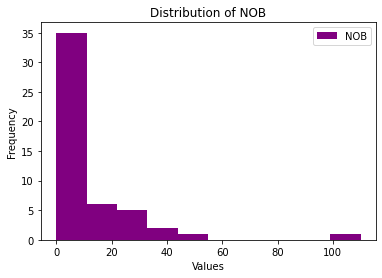

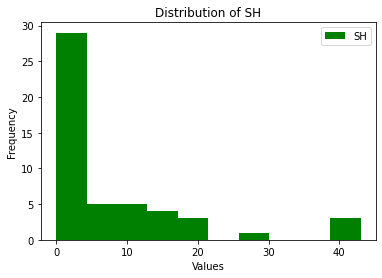

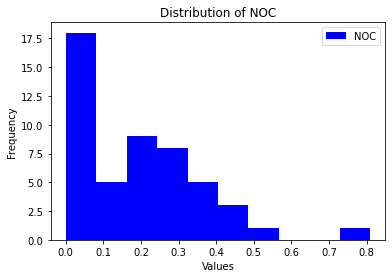

In [40]:
#show the distribution of 3 metrics
#def plotHist(columnIndex,columnName,colorName):

    #write your code here
def plotHist(columnName,colorName):
    plt.hist(data[columnName],color=colorName,histtype="bar",
             orientation="vertical",label=columnName)
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.legend()
    plt.title(f"Distribution of {columnName}")
    plt.show()

plotHist("NOB","purple")
plotHist("SH","green")
plotHist("NOC","blue")

In [41]:
#Min max scaler for all data
data2=data.copy()
scaler = MinMaxScaler()
data2.loc[:, ~data2.columns.isin(['Name'])] = scaler.fit_transform(data2.loc[:, ~data2.columns.isin(['Name'])])
#data2 = data2.set_index("Name")
data2.head()

,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,0.200000,0.055556,0.069767,0.084500,0.070707,0.081967,0.450368,0.547340,0.241690,0.328644,0.215585,0.467183,0.678344,0.483014,0.493334,0.904251
1,AndroidAsyncHTTP-master,0.100000,0.065359,0.325581,0.247000,0.237374,0.491803,0.586374,0.604499,1.000000,0.295288,0.624553,0.432401,0.423548,0.396145,0.465703,1.000000
2,android-pdf-viewer-master,0.018182,0.003268,0.000000,0.002000,0.000000,1.000000,0.000000,0.136835,0.076369,0.091712,0.275531,0.235422,0.536514,0.219697,0.231116,0.765504
3,android-permission-handler-master,0.009091,0.003268,0.023256,0.003000,0.000000,0.172131,0.102941,0.273670,0.177037,0.104300,0.204577,0.411564,0.362383,0.200758,0.299212,0.765504
4,Android-WhatsApp-master,0.000000,0.019608,0.000000,0.126500,0.171717,0.344262,0.044649,0.778146,0.088330,0.834019,1.000000,1.000000,0.885917,0.248036,1.000000,0.415032


# Part1 (Statistical Correlation Analysis)

In [42]:
#Show the correlation matrix of all metrics
data.corr(method="spearman")

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383,0.407858,0.353351,0.447180,0.349883,0.369028,0.458483,0.277107,0.062748,0.507420,0.245963
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757,0.409002,0.426221,0.345986,0.243636,0.208594,0.468565,0.289585,0.029765,0.397770,0.110767
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546,0.512876,0.391886,0.425499,0.129174,0.204069,0.278723,0.156120,-0.016116,0.349367,0.107688
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611,0.402859,0.577439,0.492868,0.440458,0.260596,0.456943,0.388502,0.065511,0.569857,0.218801
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.407858,0.409002,0.512876,0.402859,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.353351,0.426221,0.391886,0.577439,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.447180,0.345986,0.425499,0.492868,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.349883,0.243636,0.129174,0.440458,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072


In [43]:
#P values of Spearman Correlation Table
datap_value=data.corr(method="spearman")
#write your code here
cor,p_value=scipy.stats.spearmanr(data.iloc[:,1:])
p_value
for i,y in enumerate(datacor):
    datap_value.loc[y]=p_value[i]
pd.set_option('display.float_format', '{:.4f}'.format)
datap_value

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,0.0000,0.0000,0.0000,0.0000,0.0076,0.3558,0.0033,0.0118,0.0011,0.0127,0.0084,0.0008,0.0514,0.6651,0.0002,0.0851
V,0.0000,0.0000,0.0000,0.0000,0.0486,0.0364,0.0032,0.0020,0.0138,0.0882,0.1460,0.0006,0.0414,0.8374,0.0042,0.4438
SH,0.0000,0.0000,0.0000,0.0000,0.0058,0.8548,0.0001,0.0049,0.0021,0.3713,0.1552,0.0500,0.2790,0.9115,0.0129,0.4566
CS,0.0000,0.0000,0.0000,0.0000,0.0000,0.1756,0.0037,0.0000,0.0003,0.0014,0.0676,0.0009,0.0053,0.6513,0.0000,0.1269
CDR,0.0076,0.0486,0.0058,0.0000,0.0000,0.9264,0.1800,0.1394,0.0918,0.0198,0.2330,0.0881,0.0971,0.7897,0.0146,0.3935
TD,0.3558,0.0364,0.8548,0.1756,0.9264,0.0000,0.2119,0.9250,0.3819,0.8302,0.4293,0.0945,0.0930,0.9059,0.3771,0.0122
NOC,0.0033,0.0032,0.0001,0.0037,0.1800,0.2119,0.0000,0.0000,0.0000,0.4058,0.0360,0.0596,0.6078,0.9258,0.2283,0.2557
CBO,0.0118,0.0020,0.0049,0.0000,0.1394,0.9250,0.0000,0.0000,0.0023,0.2188,0.0794,0.0000,0.0919,0.4483,0.0003,0.9992
RFC,0.0011,0.0138,0.0021,0.0003,0.0918,0.3819,0.0000,0.0023,0.0000,0.3513,0.0062,0.0027,0.6165,0.0012,0.0001,0.0970
LOC,0.0127,0.0882,0.3713,0.0014,0.0198,0.8302,0.4058,0.2188,0.3513,0.0000,0.3807,0.0000,0.0000,0.6515,0.0000,0.2082


<AxesSubplot:>

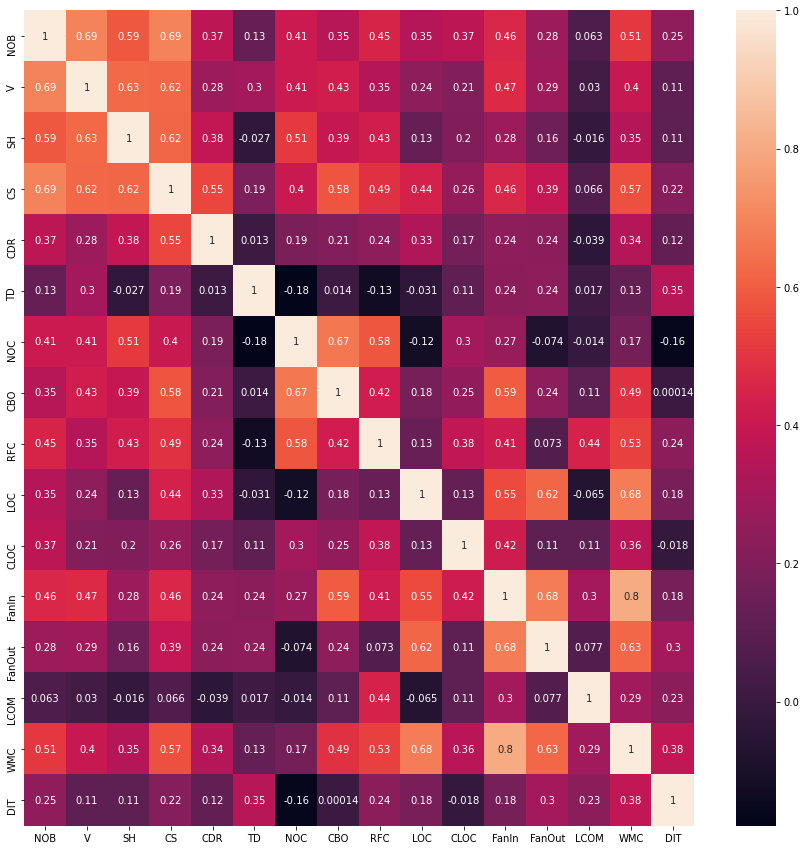

In [44]:
#If you want to see heatmap of the correlation matrix, you can launch code below:
pd.set_option('display.float_format', '{:.6f}'.format)
plt.figure(figsize=(15,15)) 
sns.heatmap(data.iloc[:,1:].corr(method="spearman"), annot=True)

In [45]:
#Correlation between External Metrics & TD
external_and_TD = data.corr(method="spearman")[["CDR", "TD"]] 
external_and_TD.iloc[:4]

,CDR,TD
NOB,0.373251,0.133383
V,0.280358,0.296757
SH,0.384657,-0.026546
CS,0.548113,0.194611


In [46]:
#Correlation between Internal Metrics & TD
internal_and_TD = data.corr(method="spearman")[["CDR", "TD"]] 
internal_and_TD.iloc[6:]

,CDR,TD
NOC,0.192707,-0.179659
CBO,0.212007,0.013652
RFC,0.240992,-0.126364
LOC,0.328527,-0.031098
CLOC,0.171773,0.114297
FanIn,0.243709,0.239077
FanOut,0.237237,0.240135
LCOM,-0.038683,0.017159
WMC,0.343628,0.127638
DIT,0.123330,0.352010


# Part2 (ML Modelling)



We are going to use 5 different ML Regression Models to predict Technical Debt values:

>Linear Regression

>Support Vector Regression

>Decision Tree Regression

>Random Forest Tree Regression

>Multi-layer Perceptron

70% of our data will be used as training set and 30% as test set. Training and test sets will be randomly. The “random_state” variable will have a fixed value so that all models get the same random data. In this way, we will be able to evaluate the success rate of the different models objectively.


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import NearestCentroid

external_metrics = data2.loc[:,'NOB':'CS']
td_metrics=data2.loc[:, 'CDR':'TD']
internal_metrics=data2.loc[:, 'NOC':]
ex_in_metrics=pd.concat([external_metrics, internal_metrics],axis=1)

#This function plots graphs to improve visual confirmation
def plotGraph(y_test,y_pred,regressorName):
  #Plot the Scatter Graph to see results better
    plt.scatter(y_test, y_test, alpha=0.5, color="r")
    plt.scatter(y_test, y_pred, alpha=0.5, color="b")
    plt.title(f'Accuracy of {regressorName}')
    plt.legend(["Original Values", "Predicted values"], loc ="upper left")
    print('R-Squared Value:',r2_score(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
    plt.show()

#Linear Regressor is one of the best choice for the data that is correlated linearly:
def linearRegression(x_train,y_train,x_test,y_test,name):
  # Create the regressor: reg_all
    regressor=LinearRegression()
    regressor.fit(x_train,y_train)
    y_pred=regressor.predict(x_test)
    plotGraph(y_test,y_pred,f"Linear Regression ({name})")
    
#SVR is also one of the most common regressor that used for regression predictions
def svrRegression(x_train,y_train,x_test,y_test,name):
    regressor = SVR(kernel = 'rbf')
    regressor.fit(x_train,y_train)
    y_pred=regressor.predict(x_test)
    plotGraph(y_test,y_pred,f"SVR(rbf) Regression ({name})")
    regressor = SVR(kernel = 'linear')
    regressor.fit(x_train,y_train)
    y_pred=regressor.predict(x_test)
    plotGraph(y_test,y_pred,f"SVR(linear) Regression ({name})")

def decisionTreeRegression(x_train,y_train,x_test,y_test,name):
    regressor = DecisionTreeRegressor(random_state = 53)
    regressor.fit(x_train,y_train)
    y_pred = regressor.predict(x_test)
    plotGraph(y_test,y_pred,f"Decision Tree Regression ({name})")

#Random Forest Tree Regression
def randomForestTreeRegression(x_train,y_train,x_test,y_test,name):
    regressor = RandomForestRegressor(random_state = 53)
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    plotGraph(y_test,y_pred,f"Random Forest Tree Regression ({name})")
    
#Multi-layer Perceptron regressor: 'This model optimizes the squared-loss using LBFGS or stochastic gradient descent.'
def mlpRegressor(x_train,y_train,x_test,y_test,name):
    regressor = MLPRegressor(random_state = 53)
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    plotGraph(y_test,y_pred,f"Multi-layer Perceptron Regression ({name})")


In this step (step 3), we will try to estimate Technical Debt using internal metrics.

In [48]:
#split data into train and test data
TDx_train, TDx_test, TDy_train, TDy_test = train_test_split(internal_metrics, td_metrics.iloc[:,1], test_size = 0.30, random_state = 53)
CDRx_train, CDRx_test, CDRy_train, CDRy_test = train_test_split(internal_metrics, td_metrics.iloc[:,0], test_size = 0.30, random_state = 53)

R-Squared Value: -0.172967530469208
Root Mean Squared Error: 0.26506407767604295


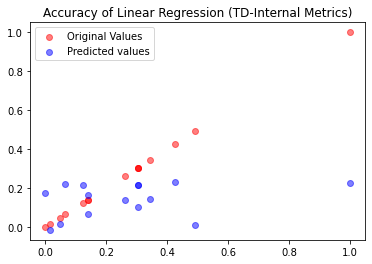

R-Squared Value: -0.253539369006031
Root Mean Squared Error: 0.2822820349754405


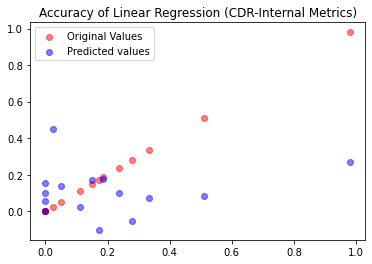

In [49]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(TDx_train,TDy_train,TDx_test,TDy_test,"TD-Internal Metrics")
linearRegression(CDRx_train,CDRy_train,CDRx_test,CDRy_test,"CDR-Internal Metrics")

R-Squared Value: -0.07658669531666251
Root Mean Squared Error: 0.25394074173641473


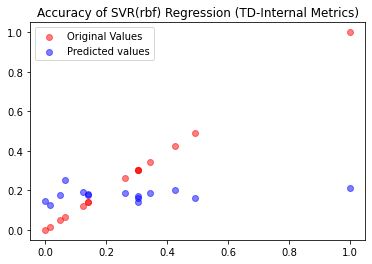

R-Squared Value: -0.3526354995047598
Root Mean Squared Error: 0.2846415332813681


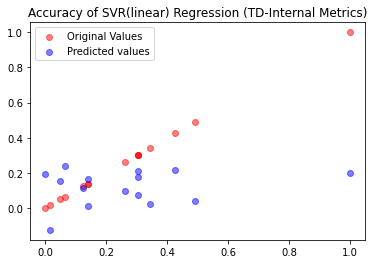

R-Squared Value: -0.16455641994479597
Root Mean Squared Error: 0.2720786834980814


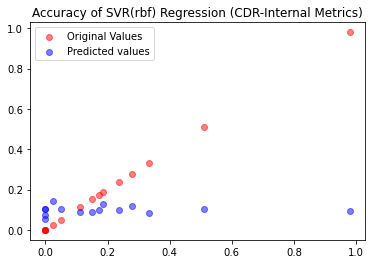

R-Squared Value: -0.12212300389682662
Root Mean Squared Error: 0.2670757664434763


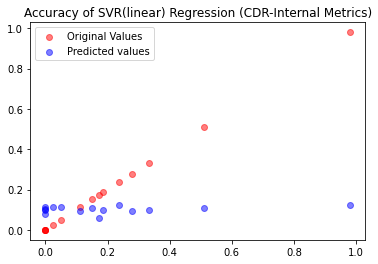

In [50]:
#Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error )
svrRegression(TDx_train,TDy_train,TDx_test,TDy_test,"TD-Internal Metrics")
svrRegression(CDRx_train,CDRy_train,CDRx_test,CDRy_test,"CDR-Internal Metrics")

R-Squared Value: -0.5204592360688753
Root Mean Squared Error: 0.30178334647732696


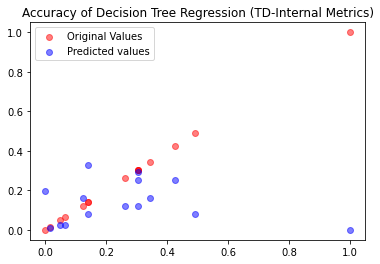

R-Squared Value: -0.12150757783825572
Root Mean Squared Error: 0.26700251782083956


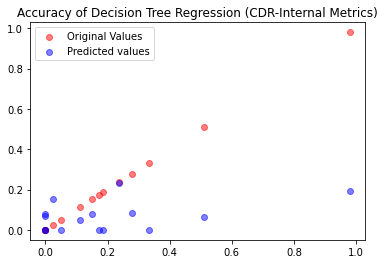

In [51]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
decisionTreeRegression(TDx_train,TDy_train,TDx_test,TDy_test,"TD-Internal Metrics")
decisionTreeRegression(CDRx_train,CDRy_train,CDRx_test,CDRy_test,"CDR-Internal Metrics")

R-Squared Value: -0.16969786733401793
Root Mean Squared Error: 0.26469438498303655


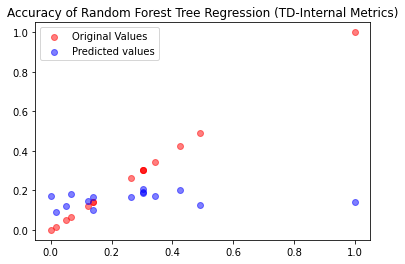

R-Squared Value: -0.05101676969007363
Root Mean Squared Error: 0.25847531504491733


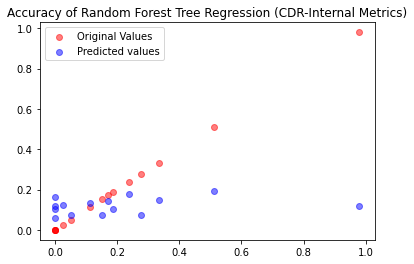

In [52]:
#Model for Random Forest Tree Regression (show also R-Squared Value and Root Mean Squared Error )
randomForestTreeRegression(TDx_train,TDy_train,TDx_test,TDy_test,"TD-Internal Metrics")
randomForestTreeRegression(CDRx_train,CDRy_train,CDRx_test,CDRy_test,"CDR-Internal Metrics")

R-Squared Value: -0.48717723192559936
Root Mean Squared Error: 0.29846213653832626


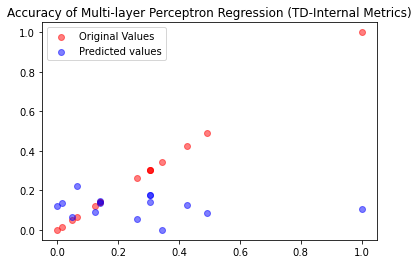

R-Squared Value: -0.22435327148884188
Root Mean Squared Error: 0.2789765014141509


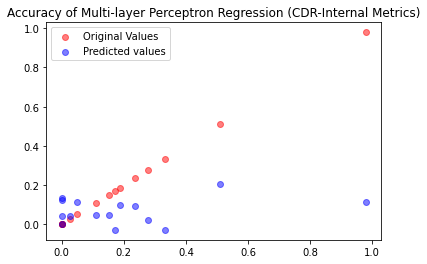

In [53]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
mlpRegressor(TDx_train,TDy_train,TDx_test,TDy_test,"TD-Internal Metrics")
mlpRegressor(CDRx_train,CDRy_train,CDRx_test,CDRy_test,"CDR-Internal Metrics")

In this step (step 4), we will try to estimate Technical Debt using external metrics.

In [54]:
#split data into train and test data
TDx_train, TDx_test, TDy_train, TDy_test = train_test_split(external_metrics, td_metrics.iloc[:,1], test_size = 0.30, random_state = 53)
CDRx_train, CDRx_test, CDRy_train, CDRy_test = train_test_split(external_metrics, td_metrics.iloc[:,0], test_size = 0.30, random_state = 53)

R-Squared Value: -0.4331628534217624
Root Mean Squared Error: 0.2929919249634493


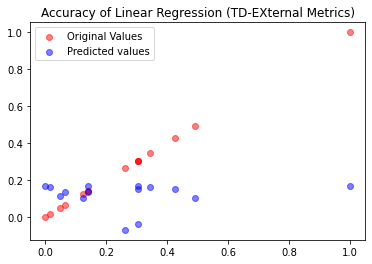

R-Squared Value: -0.2987740793386182
Root Mean Squared Error: 0.2873300555429503


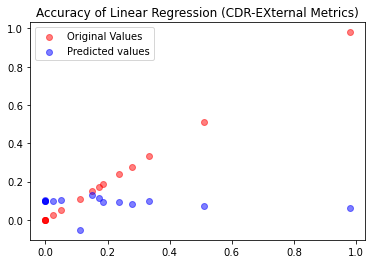

In [55]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(TDx_train,TDy_train,TDx_test,TDy_test,"TD-EXternal Metrics")
linearRegression(CDRx_train,CDRy_train,CDRx_test,CDRy_test,"CDR-EXternal Metrics")

R-Squared Value: -0.45281551449179935
Root Mean Squared Error: 0.2949939533353097


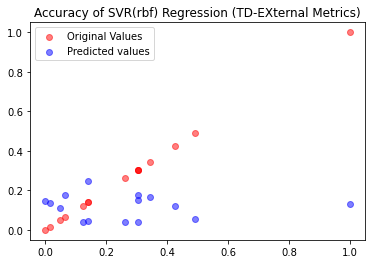

R-Squared Value: -0.3170558678590276
Root Mean Squared Error: 0.28087299055485854


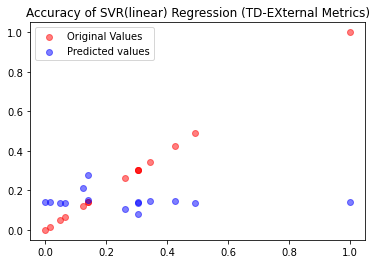

R-Squared Value: -0.05742000726843233
Root Mean Squared Error: 0.2592614897703499


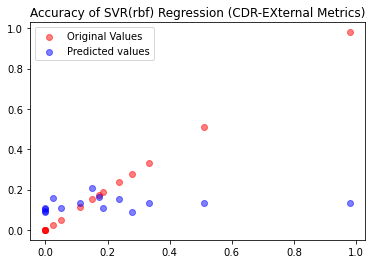

R-Squared Value: -0.10105796501066222
Root Mean Squared Error: 0.2645570517029422


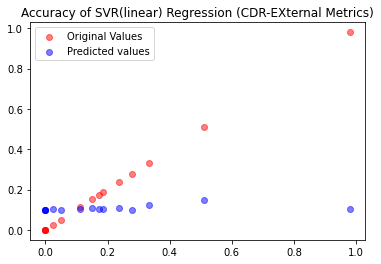

In [56]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )
svrRegression(TDx_train,TDy_train,TDx_test,TDy_test,"TD-EXternal Metrics")
svrRegression(CDRx_train,CDRy_train,CDRx_test,CDRy_test,"CDR-EXternal Metrics")

R-Squared Value: -0.7371656181142008
Root Mean Squared Error: 0.32257335573307827


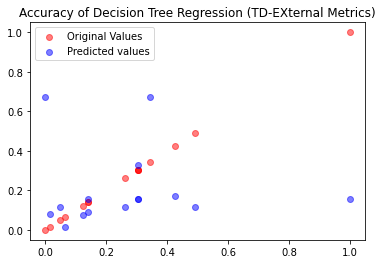

R-Squared Value: -0.49827719657436775
Root Mean Squared Error: 0.3086102422213462


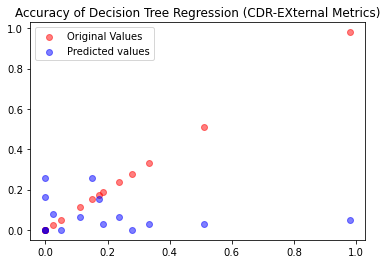

In [57]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
decisionTreeRegression(TDx_train,TDy_train,TDx_test,TDy_test,"TD-EXternal Metrics")
decisionTreeRegression(CDRx_train,CDRy_train,CDRx_test,CDRy_test,"CDR-EXternal Metrics")

R-Squared Value: -0.11428872623308783
Root Mean Squared Error: 0.2583489780064541


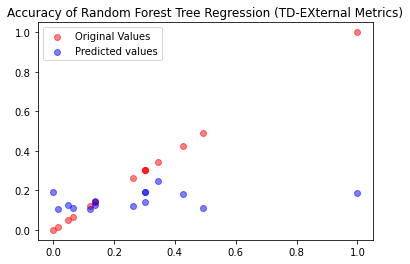

R-Squared Value: -0.26333860652667807
Root Mean Squared Error: 0.28338322249338543


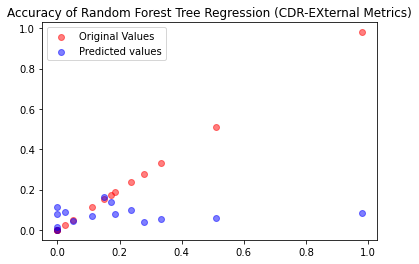

In [58]:
#Model for Random Forest Tree Regression (show also R-Squared Value and Root Mean Squared Error )
randomForestTreeRegression(TDx_train,TDy_train,TDx_test,TDy_test,"TD-EXternal Metrics")
randomForestTreeRegression(CDRx_train,CDRy_train,CDRx_test,CDRy_test,"CDR-EXternal Metrics")

R-Squared Value: -0.19051694994963908
Root Mean Squared Error: 0.2670396014132049


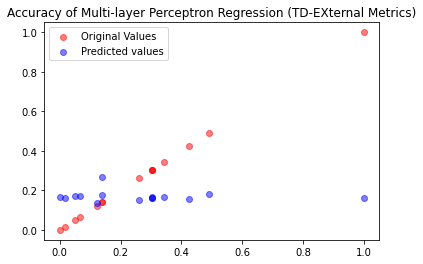

R-Squared Value: -0.17331247765522573
Root Mean Squared Error: 0.2730996195799929


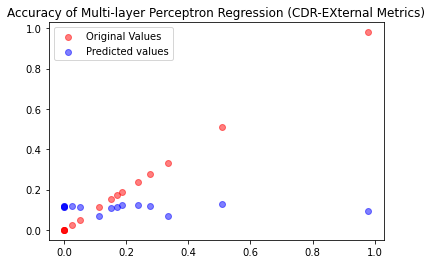

In [59]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
mlpRegressor(TDx_train,TDy_train,TDx_test,TDy_test,"TD-EXternal Metrics")
mlpRegressor(CDRx_train,CDRy_train,CDRx_test,CDRy_test,"CDR-EXternal Metrics")

In this step 5, we will try to estimate Technical Debt using all internal and external metrics.

In [60]:
#split data into train and test data
TDx_train, TDx_test, TDy_train, TDy_test = train_test_split(ex_in_metrics, td_metrics.iloc[:,1], test_size = 0.30, random_state = 53)
CDRx_train, CDRx_test, CDRy_train, CDRy_test = train_test_split(ex_in_metrics, td_metrics.iloc[:,0], test_size = 0.30, random_state = 53)

R-Squared Value: -0.003633279100097475
Root Mean Squared Error: 0.2451858519572479


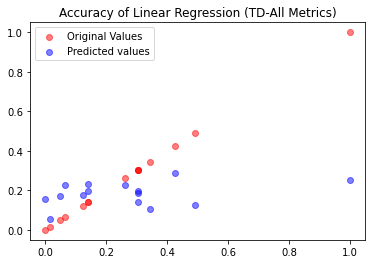

R-Squared Value: -2.0091415912958004
Root Mean Squared Error: 0.43735647669844646


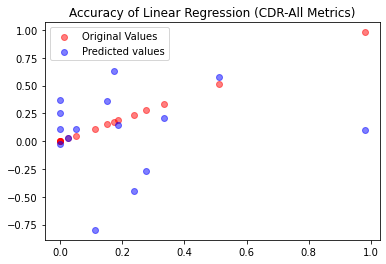

In [61]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(TDx_train,TDy_train,TDx_test,TDy_test,"TD-All Metrics")
linearRegression(CDRx_train,CDRy_train,CDRx_test,CDRy_test,"CDR-All Metrics")

R-Squared Value: -0.09720921648004222
Root Mean Squared Error: 0.2563613813817413


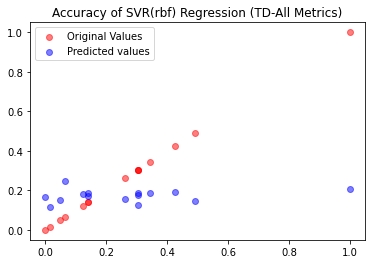

R-Squared Value: -0.36281172246930304
Root Mean Squared Error: 0.2857102425477753


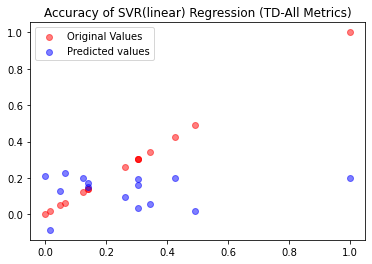

R-Squared Value: -0.23945919966775864
Root Mean Squared Error: 0.2806922153718834


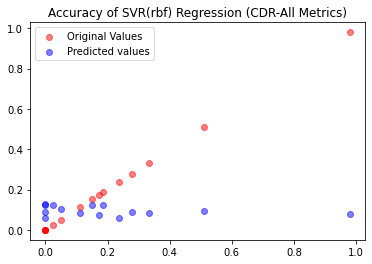

R-Squared Value: -0.1605709781449498
Root Mean Squared Error: 0.2716127193456499


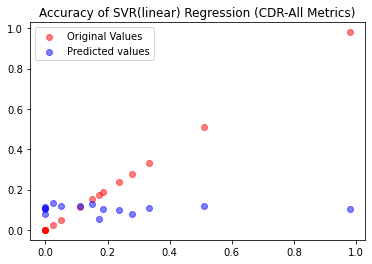

In [62]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )
svrRegression(TDx_train,TDy_train,TDx_test,TDy_test,"TD-All Metrics")
svrRegression(CDRx_train,CDRy_train,CDRx_test,CDRy_test,"CDR-All Metrics")

R-Squared Value: -0.2556706581453083
Root Mean Squared Error: 0.2742494419820825


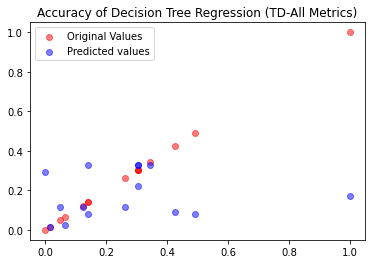

R-Squared Value: -0.05417378556625985
Root Mean Squared Error: 0.25886322456148736


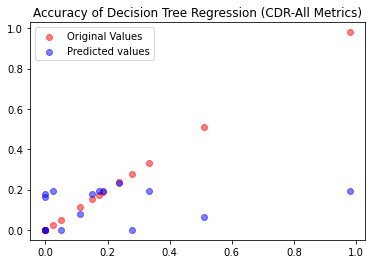

In [63]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
decisionTreeRegression(TDx_train,TDy_train,TDx_test,TDy_test,"TD-All Metrics")
decisionTreeRegression(CDRx_train,CDRy_train,CDRx_test,CDRy_test,"CDR-All Metrics")

R-Squared Value: 0.07627455457291843
Root Mean Squared Error: 0.23522275547294955


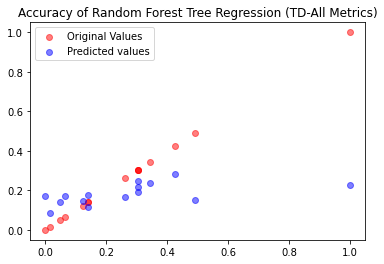

R-Squared Value: 0.01479470371704672
Root Mean Squared Error: 0.2502520360002964


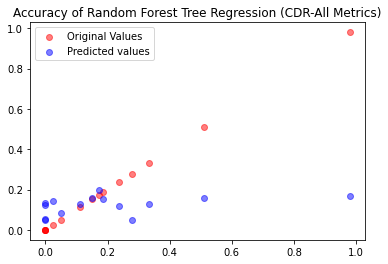

In [64]:
#Model for Random Forest Tree Regression (show also R-Squared Value and Root Mean Squared Error )
randomForestTreeRegression(TDx_train,TDy_train,TDx_test,TDy_test,"TD-All Metrics")
randomForestTreeRegression(CDRx_train,CDRy_train,CDRx_test,CDRy_test,"CDR-All Metrics")

R-Squared Value: -0.09356621979107316
Root Mean Squared Error: 0.25593543701691623


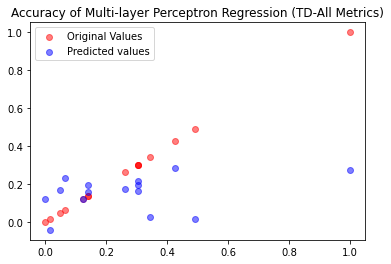

R-Squared Value: -0.47729270505957033
Root Mean Squared Error: 0.3064414630972095


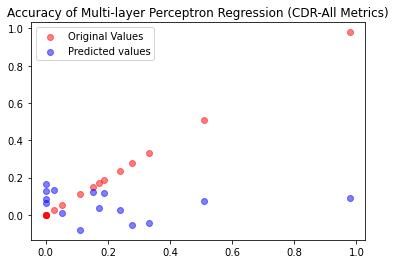

In [65]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
mlpRegressor(TDx_train,TDy_train,TDx_test,TDy_test,"TD-All Metrics")
mlpRegressor(CDRx_train,CDRy_train,CDRx_test,CDRy_test,"CDR-All Metrics")